## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [51]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

## Loading the dataset

In [53]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/AI Course/Module 2/Project 2/Loan_Modelling.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## Data Overview

* Observations
* Sanity checks

In [54]:
# Displaying first few rows
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [55]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [56]:
df.shape

(5000, 14)

In [57]:
df.dtypes

,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIPCode,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal_Loan,int64


In [58]:
# Generating summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [59]:
df["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [60]:
df[df["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [61]:
df["Experience"].replace(-1, 1, inplace=True)
df["Experience"].replace(-2, 2, inplace=True)
df["Experience"].replace(-3, 3, inplace=True)

In [62]:
df["Education"].unique()

array([1, 2, 3])

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

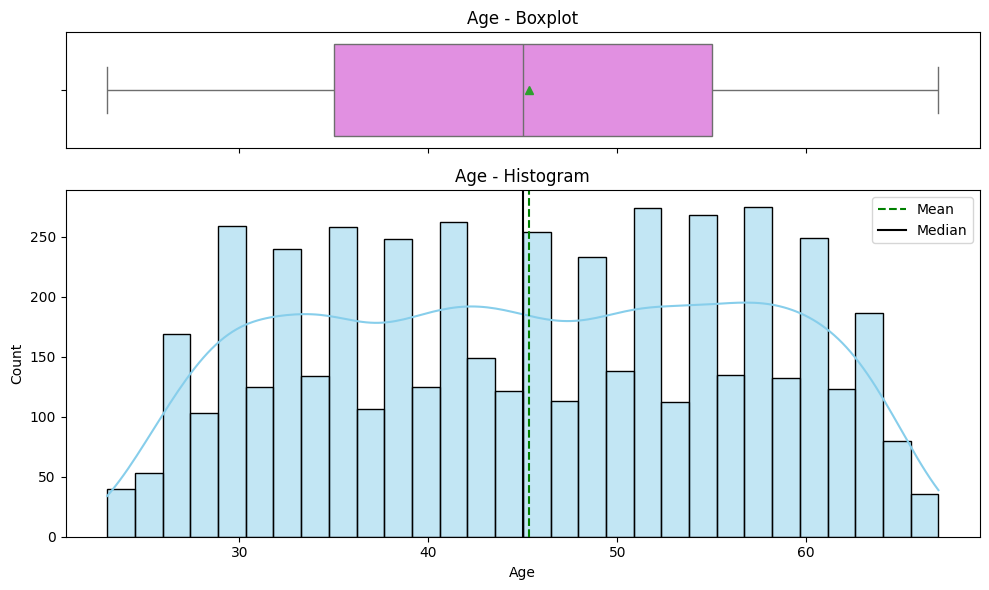

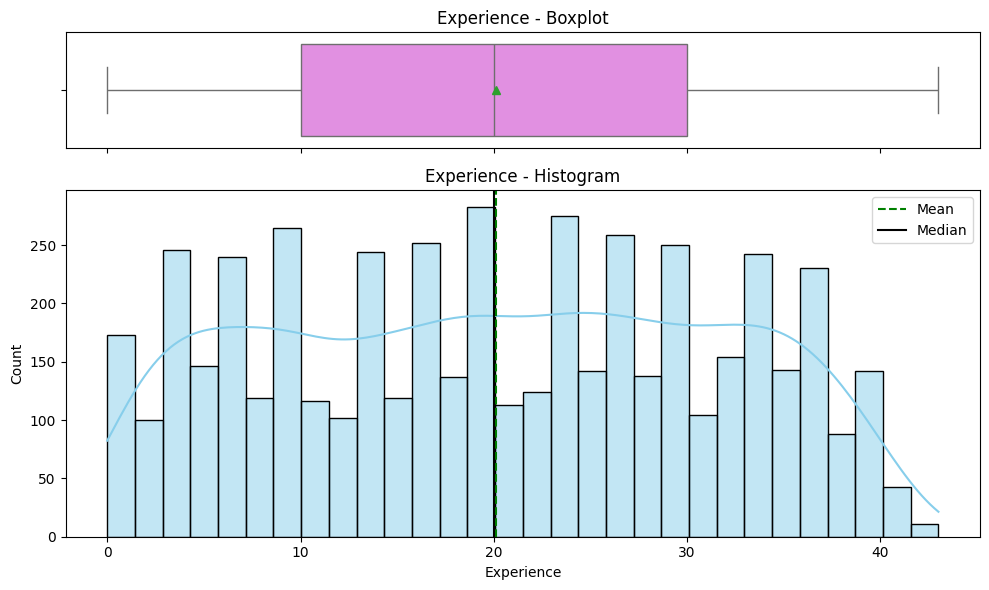

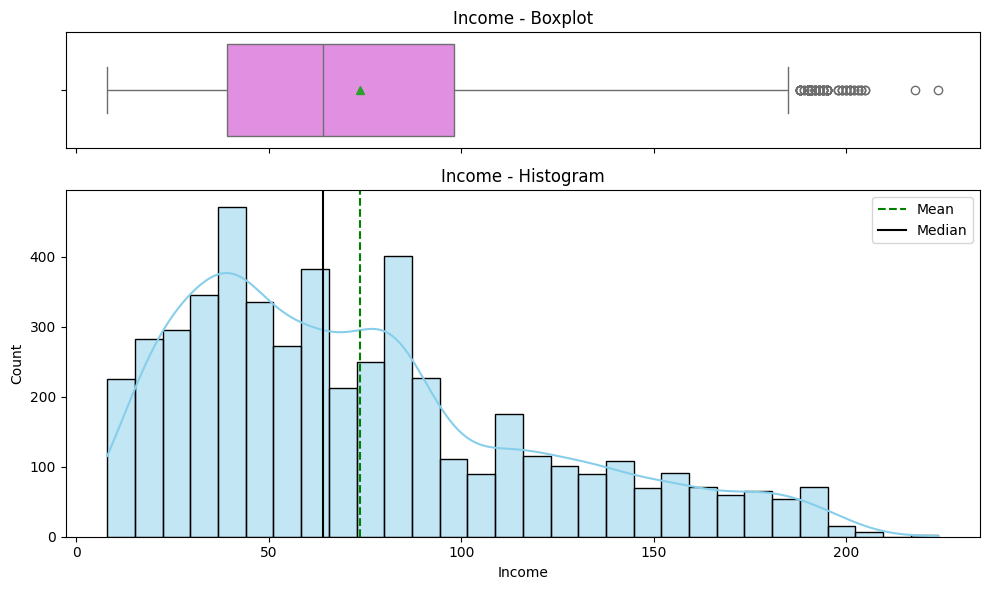

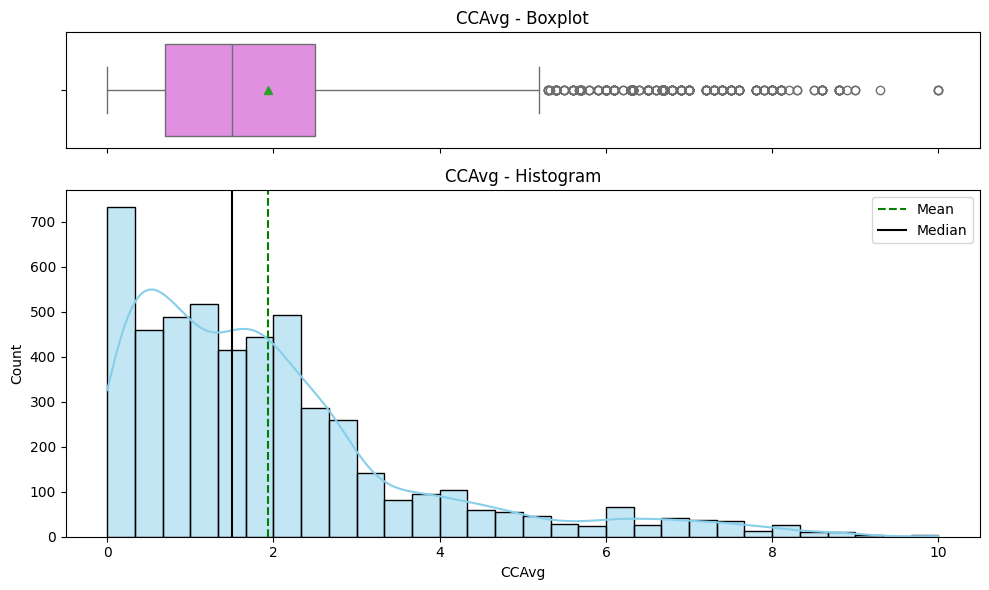

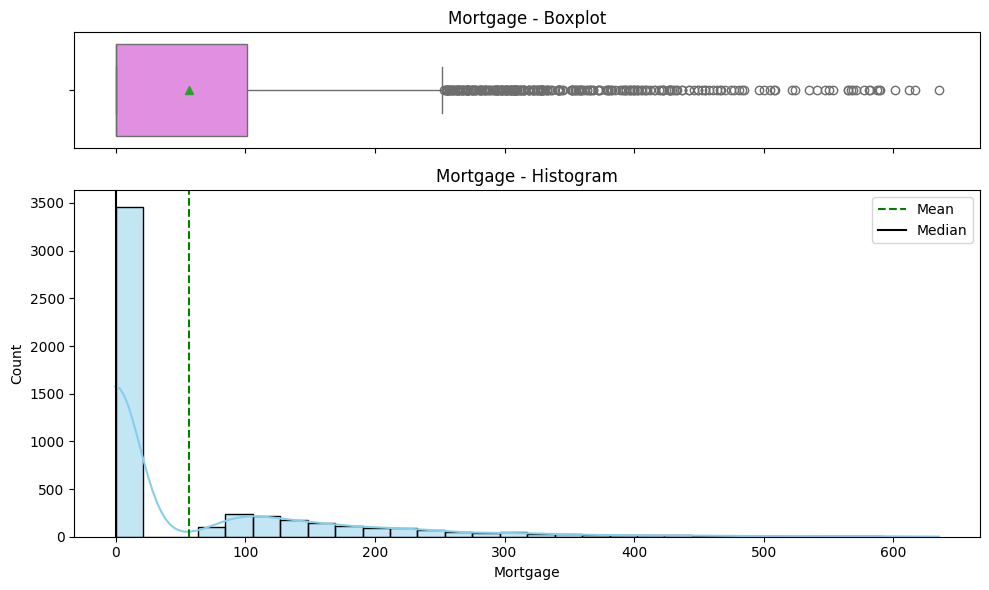

In [63]:
def plot_num(data, column, bins=30):
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 3]})

    sns.boxplot(x=data[column], ax=ax1, color='violet', showmeans=True)
    sns.histplot(data[column], bins=bins, kde=True, ax=ax2, color='skyblue')

    ax2.axvline(data[column].mean(), color='green', linestyle='--', label='Mean')
    ax2.axvline(data[column].median(), color='black', linestyle='-', label='Median')
    ax2.legend()
    ax1.set(title=f"{column} - Boxplot")
    ax2.set(title=f"{column} - Histogram")

    plt.tight_layout()
    plt.show()

# Visualizing data
plot_num(df, "Age")
plot_num(df, "Experience")
plot_num(df, "Income")
plot_num(df, "CCAvg")
plot_num(df, "Mortgage")


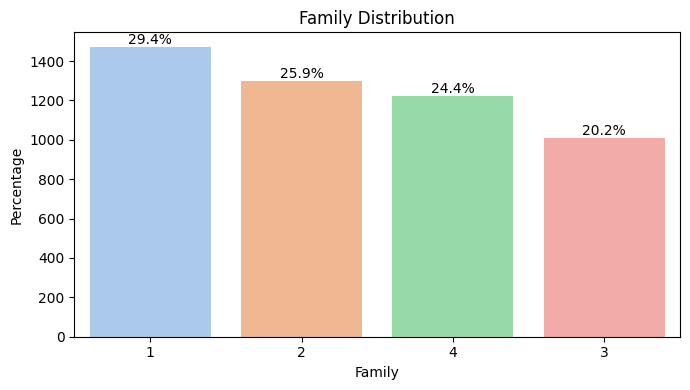

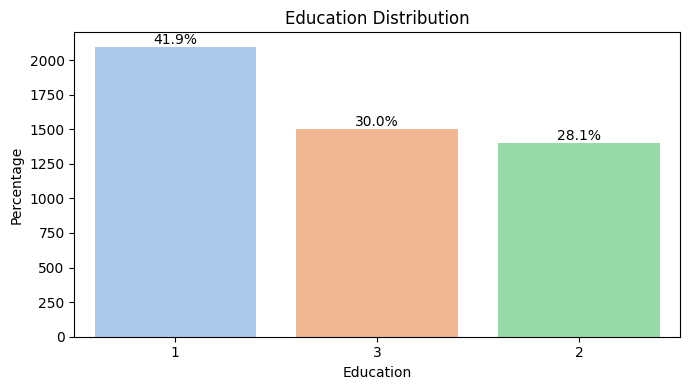

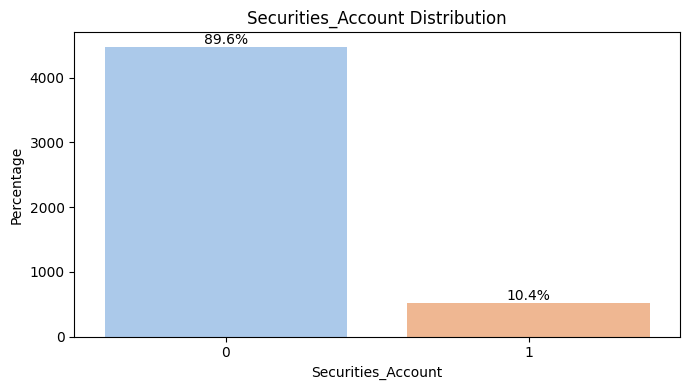

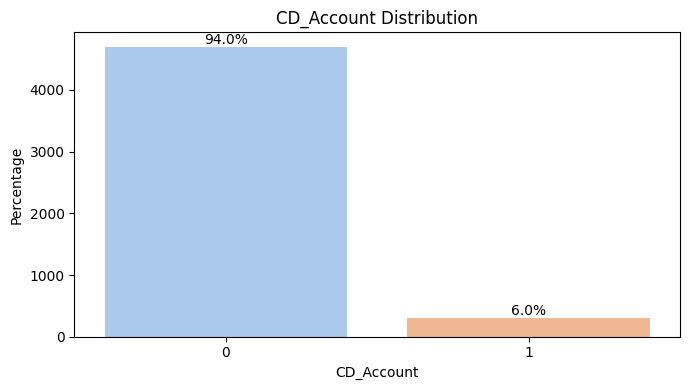

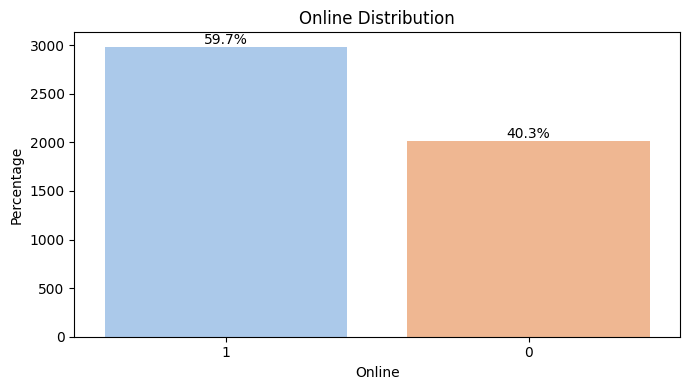

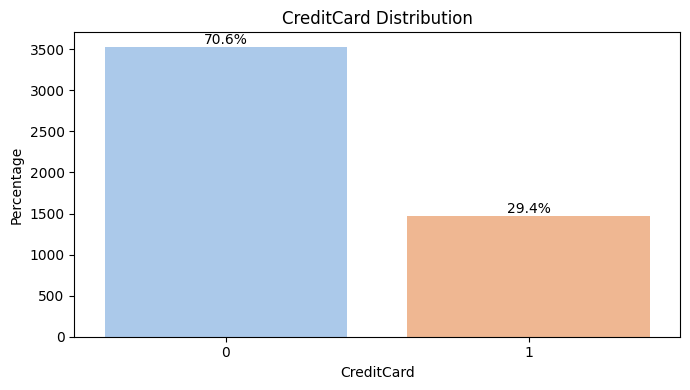

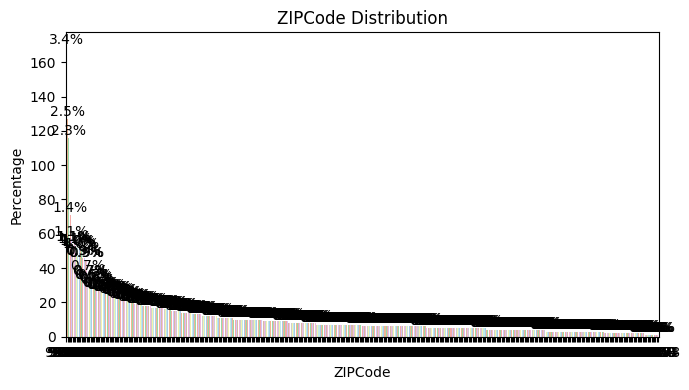

In [64]:
def plot_cat(data, column, perc=True):
    total = len(data[column])
    order = data[column].value_counts().index

    plt.figure(figsize=(7, 4))
    ax = sns.countplot(data=data, x=column, order=order, palette='pastel')

    for p in ax.patches:
        val = p.get_height()
        label = f"{(val/total*100):.1f}%" if perc else f"{val}"
        ax.annotate(label, (p.get_x() + p.get_width()/2, val), ha='center', va='bottom', fontsize=10)

    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Percentage" if perc else "Count")
    plt.tight_layout()
    plt.show()

# Visualizing data
plot_cat(df, "Family")
plot_cat(df, "Education")
plot_cat(df, "Securities_Account")
plot_cat(df, "CD_Account")
plot_cat(df, "Online")
plot_cat(df, "CreditCard")
plot_cat(df, "ZIPCode")

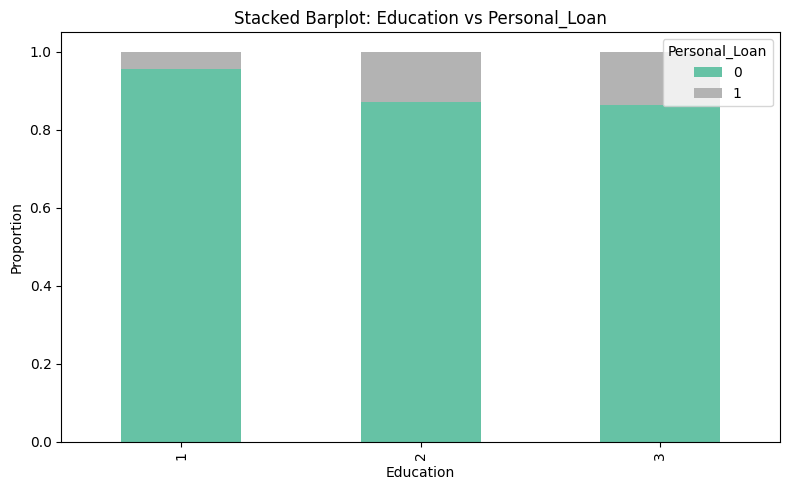

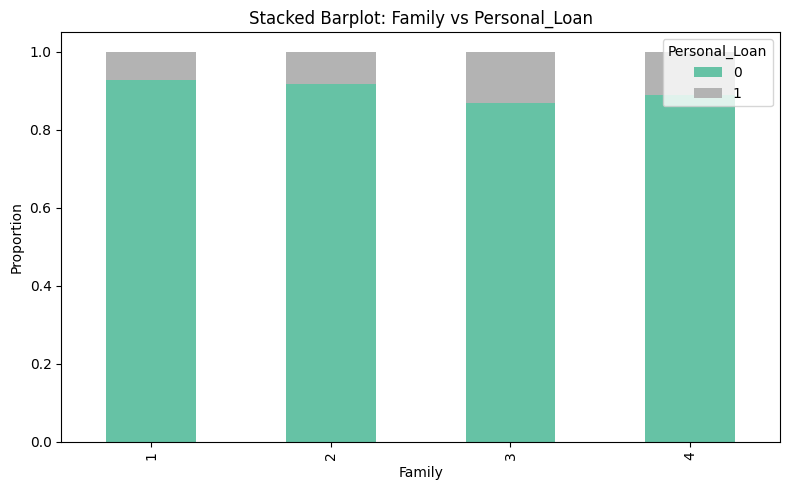

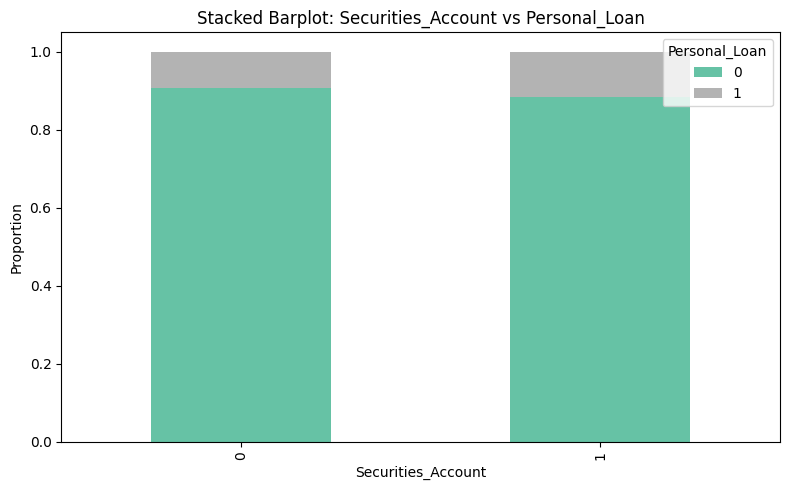

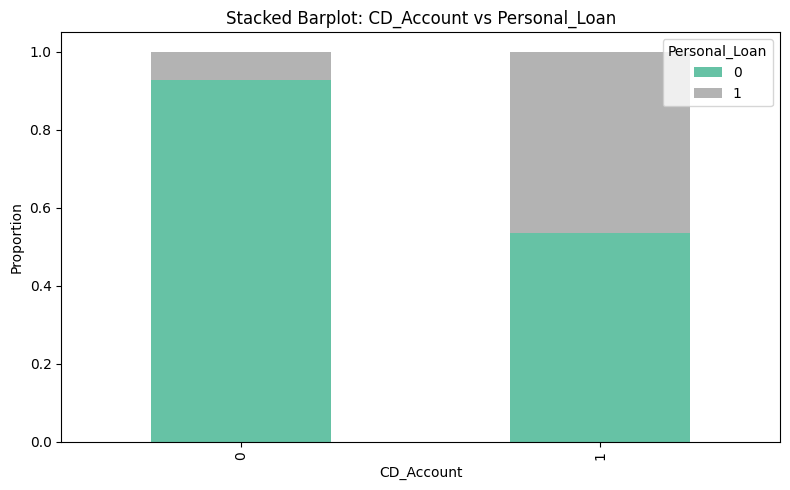

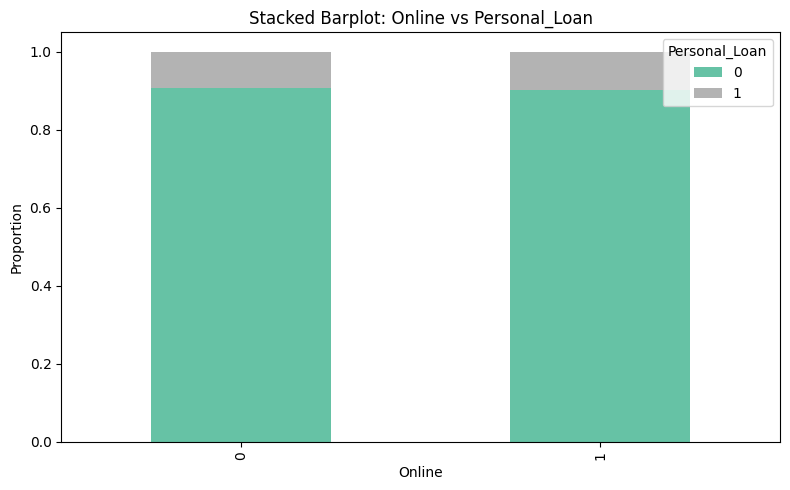

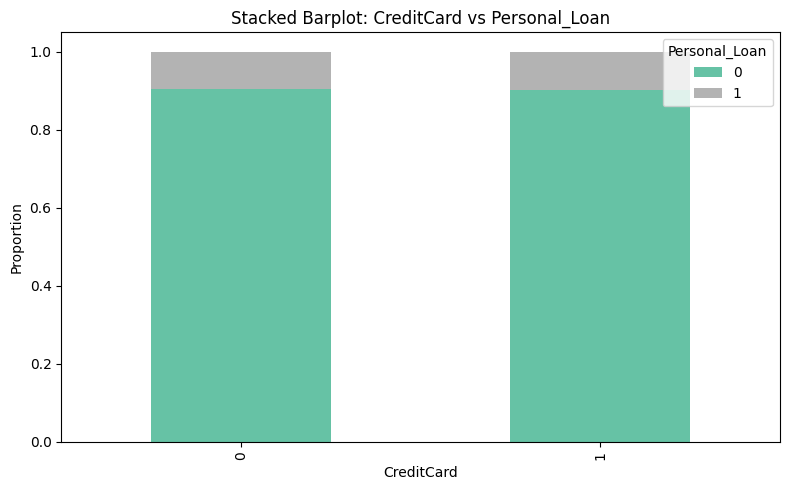

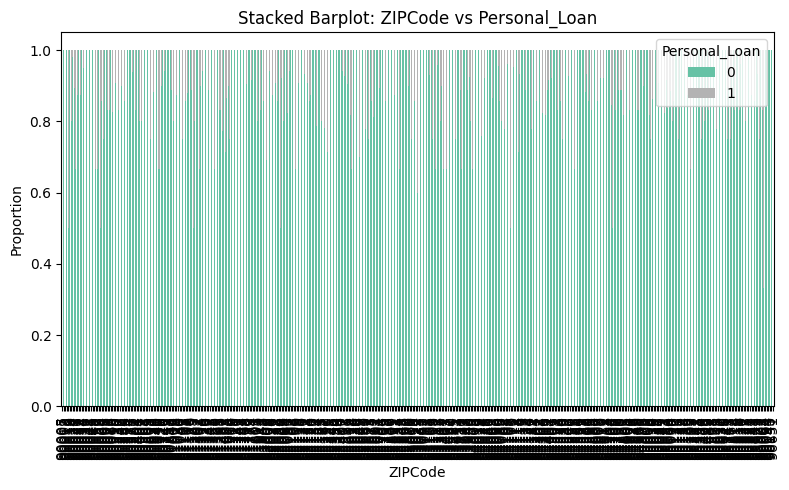

In [65]:
def categorical_bivariate_plot(data, predictor, target):
    tab = pd.crosstab(data[predictor], data[target], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Set2")
    plt.title(f"Stacked Barplot: {predictor} vs {target}")
    plt.ylabel("Proportion")
    plt.xlabel(predictor)
    plt.legend(title=target, loc="upper right")
    plt.tight_layout()
    plt.show()

# Visualizing data
categorical_bivariate_plot(df, "Education", "Personal_Loan")
categorical_bivariate_plot(df, "Family", "Personal_Loan")
categorical_bivariate_plot(df, "Securities_Account", "Personal_Loan")
categorical_bivariate_plot(df, "CD_Account", "Personal_Loan")
categorical_bivariate_plot(df, "Online", "Personal_Loan")
categorical_bivariate_plot(df, "CreditCard", "Personal_Loan")
categorical_bivariate_plot(df, "ZIPCode", "Personal_Loan")

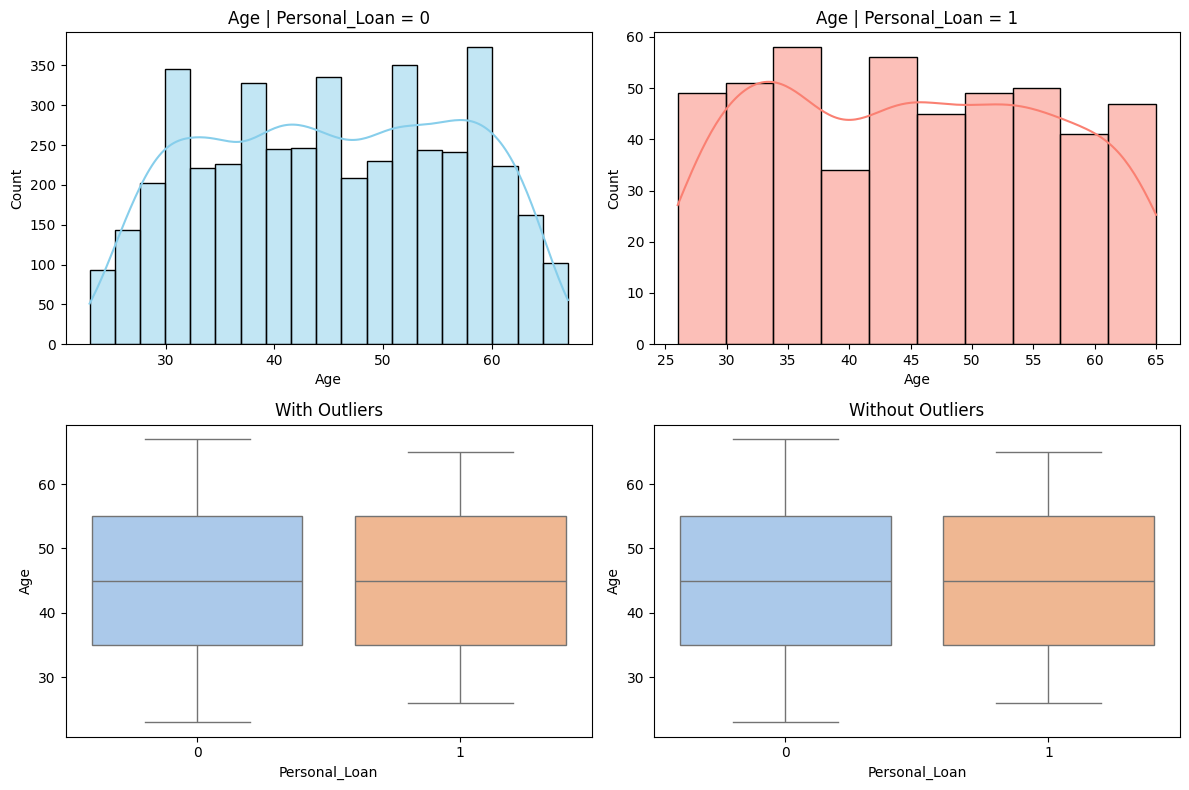

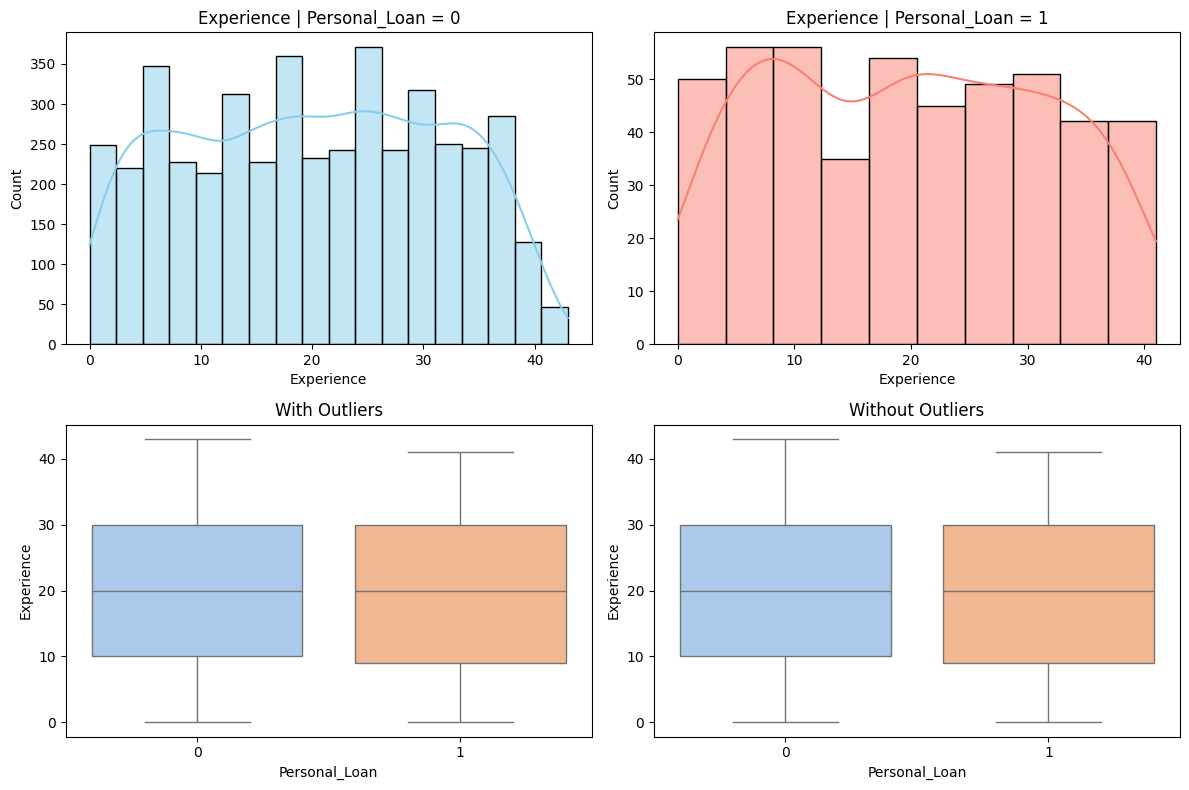

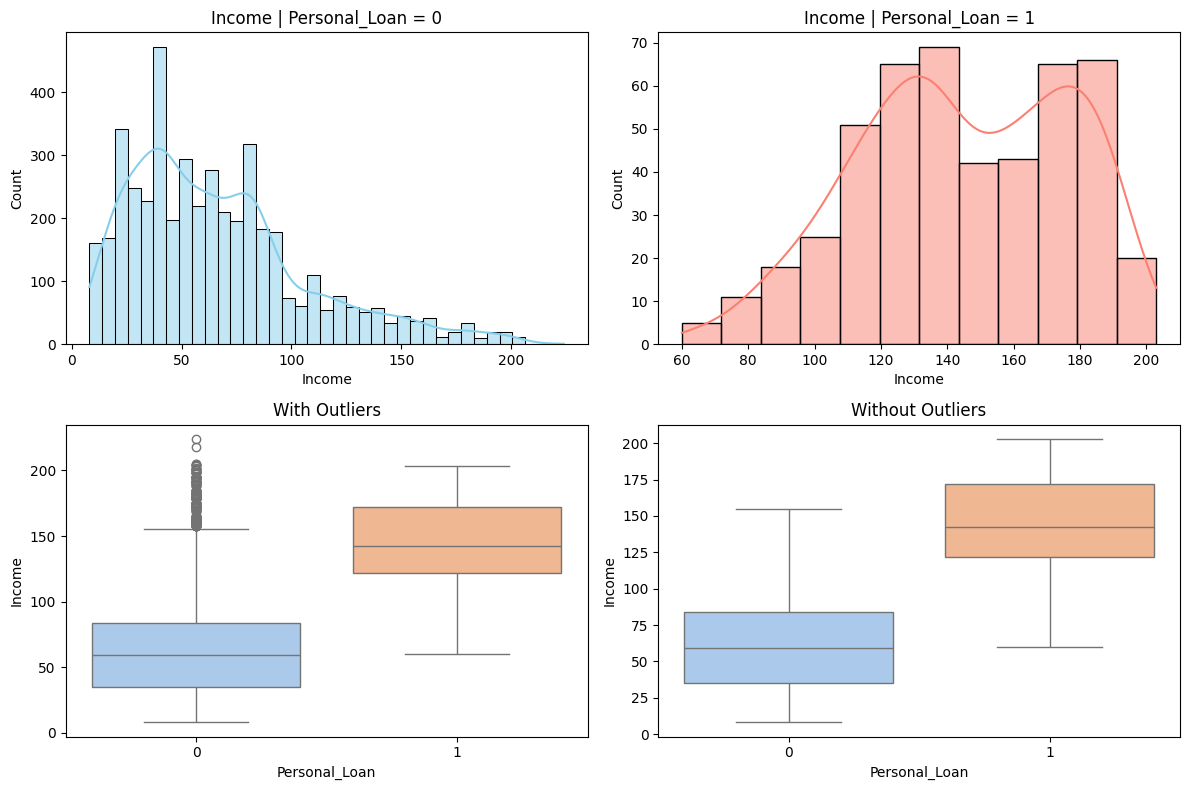

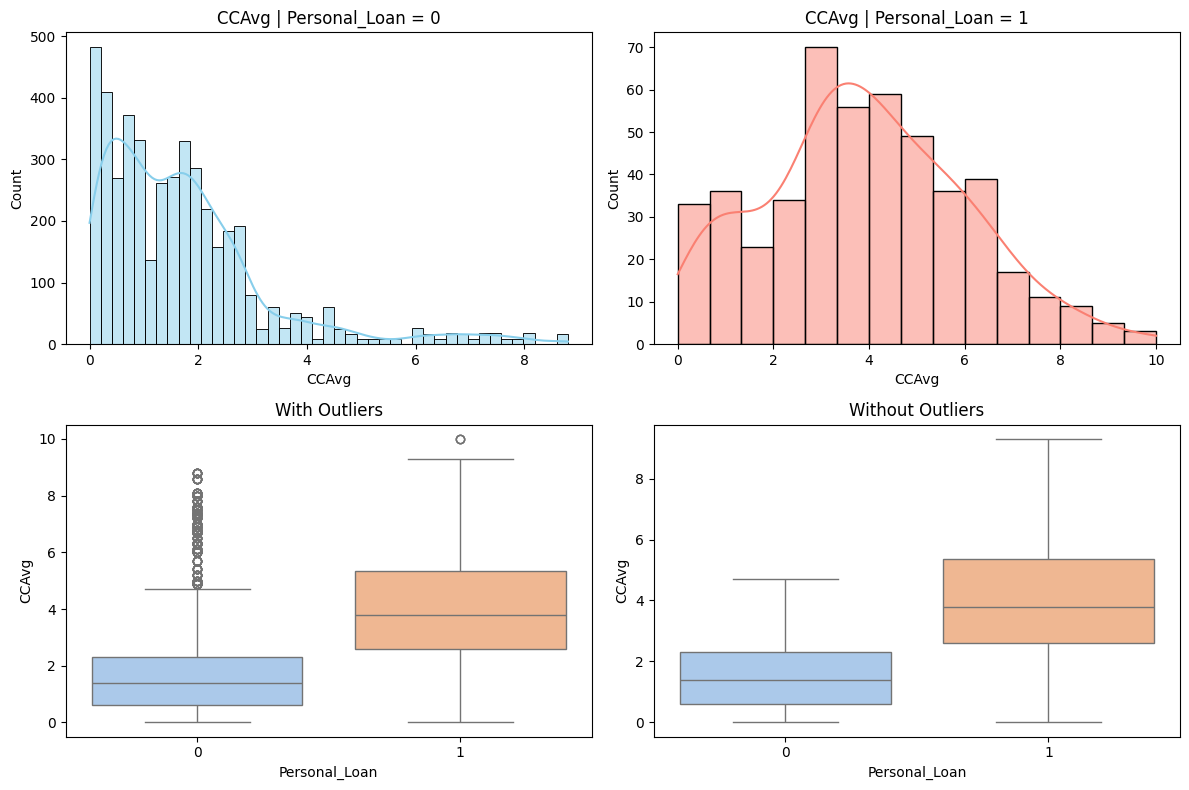

In [66]:
def numeric_bivariate_plot(data, predictor, target):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    sns.histplot(data[data[target] == 0][predictor], ax=axes[0, 0], color='skyblue', kde=True)
    axes[0, 0].set_title(f"{predictor} | {target} = 0")
    sns.histplot(data[data[target] == 1][predictor], ax=axes[0, 1], color='salmon', kde=True)
    axes[0, 1].set_title(f"{predictor} | {target} = 1")
    sns.boxplot(x=target, y=predictor, data=data, ax=axes[1, 0], palette="pastel")
    axes[1, 0].set_title("With Outliers")
    sns.boxplot(x=target, y=predictor, data=data, ax=axes[1, 1], palette="pastel", showfliers=False)
    axes[1, 1].set_title("Without Outliers")
    plt.tight_layout()
    plt.show()

# Visualizing data
numeric_bivariate_plot(df, "Age", "Personal_Loan")
numeric_bivariate_plot(df, "Experience", "Personal_Loan")
numeric_bivariate_plot(df, "Income", "Personal_Loan")
numeric_bivariate_plot(df, "CCAvg", "Personal_Loan")


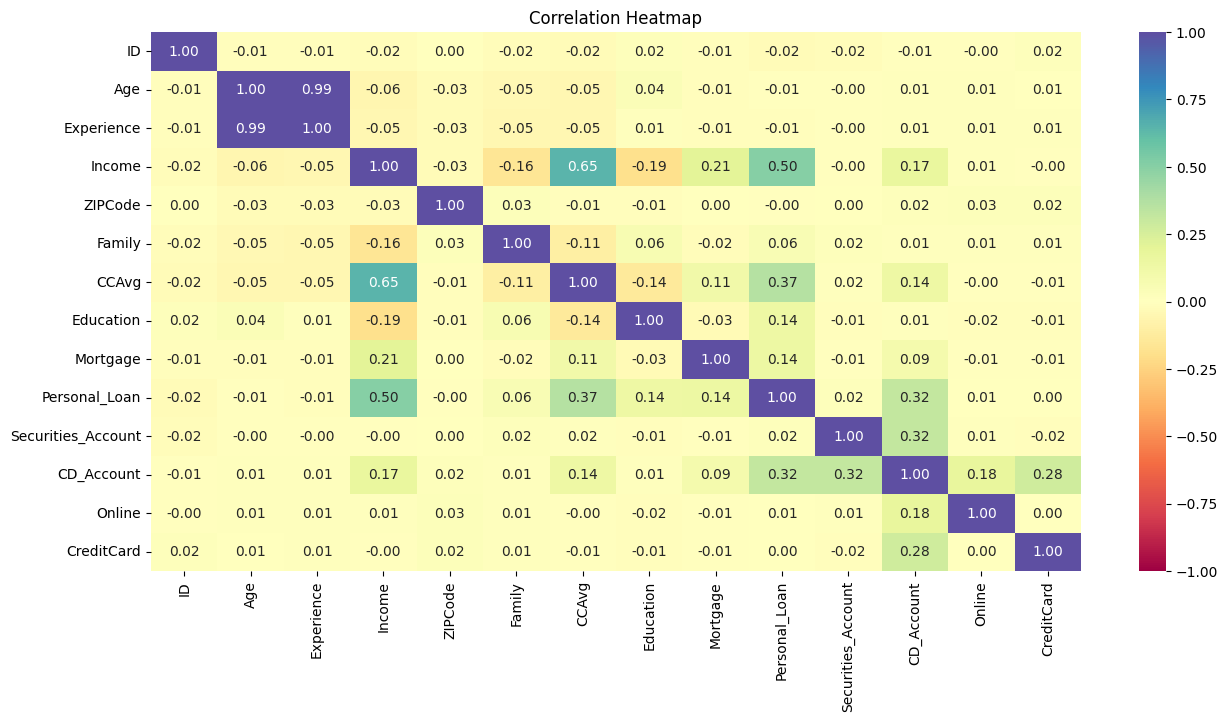

In [67]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="Spectral", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

## Model Building

### Model Evaluation Criterion

*


### Model Building

In [68]:
X = df.drop(["Personal_Loan", "Experience"], axis=1)
y = df["Personal_Loan"]
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)
X = X.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [69]:
def evaluate_model_classification(model, X, y):
# Making predictions
    pred = model.predict(X)
    metrics = {
        "Accuracy": accuracy_score(y, pred),
        "Recall": recall_score(y, pred),
        "Precision": precision_score(y, pred),
        "F1 Score": f1_score(y, pred)
    }
    return pd.DataFrame([metrics])

def plot_conf_matrix(model, X, y):
# Making predictions
    pred = model.predict(X)
# Evaluating model performance
    cm = confusion_matrix(y, pred)
    labels = np.array([
        [f"{val}\n{val/cm.sum():.2%}" for val in row] for row in cm
    ])
    plt.figure(figsize=(6, 4))

# Visualizing data
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

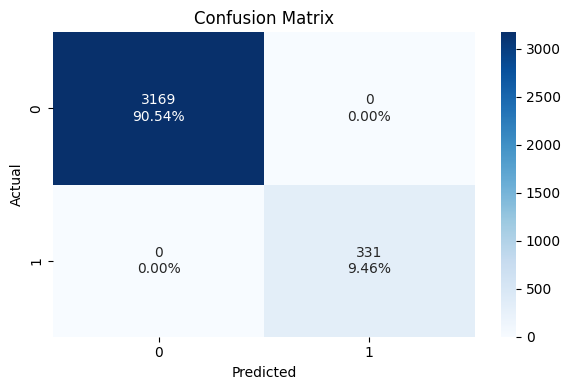

,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


In [70]:
# Building a Decision Tree model
tree_model = DecisionTreeClassifier(random_state=1)
# Training the model
tree_model.fit(X_train, y_train)

# Visualizing data
plot_conf_matrix(tree_model, X_train, y_train)
train_perf_dt = evaluate_model_classification(tree_model, X_train, y_train)
train_perf_dt

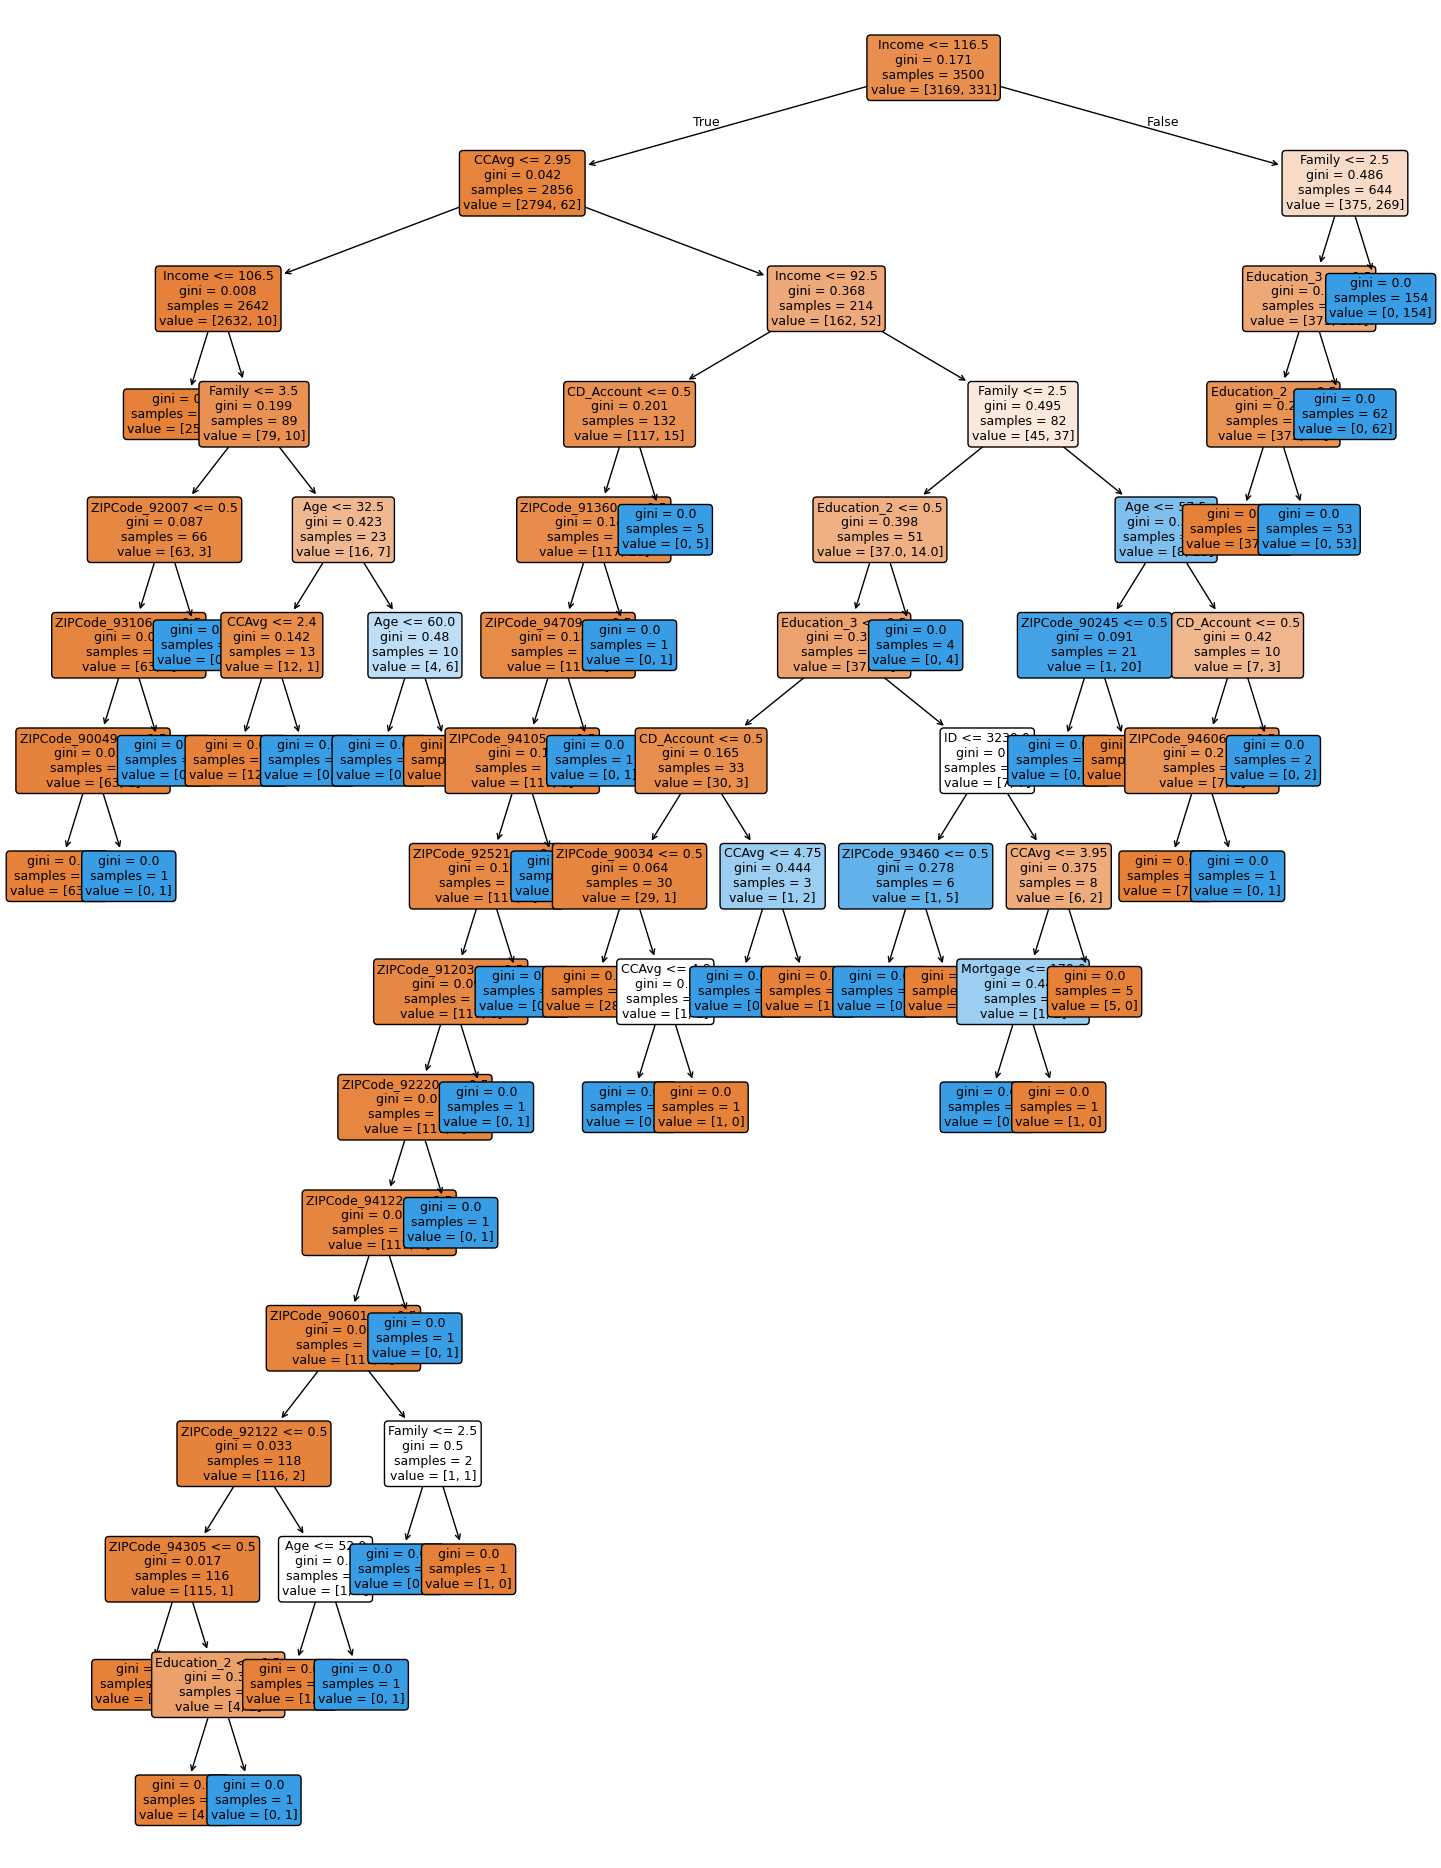

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_92007 <= 0.50
|   |   |   |   |   |--- ZIPCode_93106 <= 0.50
|   |   |   |   |   |   |--- ZIPCode_90049 <= 0.50
|   |   |   |   |   |   |   |--- weights: [63.00, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_90049 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ZIPCode_93106 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_92007 >  0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- CCAvg <= 2.40
|   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  2.40
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |---

In [71]:
tree_features = list(X_train.columns)

plt.figure(figsize=(18, 24))
# Visualizing data
nodes = tree.plot_tree(
    tree_model,
    feature_names=tree_features,
    filled=True,
    rounded=True,
    fontsize=9
)
for n in nodes:
    if n.arrow_patch:
        n.arrow_patch.set_edgecolor("black")
        n.arrow_patch.set_linewidth(1)
plt.show()

print(tree.export_text(tree_model, feature_names=tree_features, show_weights=True))

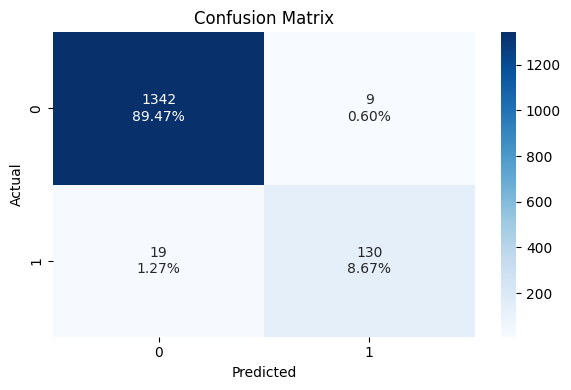

,Accuracy,Recall,Precision,F1 Score
0,0.981333,0.872483,0.935252,0.902778


In [72]:
plot_conf_matrix(tree_model, X_test, y_test)
test_perf_dt = evaluate_model_classification(tree_model, X_test, y_test)
test_perf_dt

## Model Performance Improvement

pre prunning

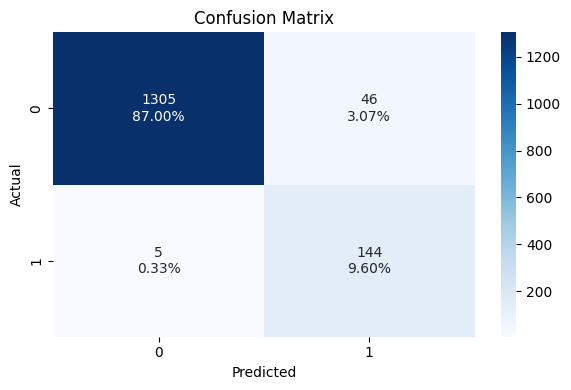

,Accuracy,Recall,Precision,F1 Score
0,0.966,0.966443,0.757895,0.849558


In [73]:
best_model = None
best_recall = 0

for depth in [3, 5, 7]:
    for leaves in [20, 50, 100]:
        for min_split in [10, 30, 50]:
# Building a Decision Tree model
            model = DecisionTreeClassifier(
                max_depth=depth,
                max_leaf_nodes=leaves,
                min_samples_split=min_split,
                class_weight="balanced",
                random_state=1
            )
# Training the model
            model.fit(X_train, y_train)
# Making predictions
            recall = recall_score(y_test, model.predict(X_test))

            if recall > best_recall:
                best_recall = recall
                best_model = model

# Visualizing data
plot_conf_matrix(best_model, X_test, y_test)
evaluate_model_classification(best_model, X_test, y_test)

post prunning

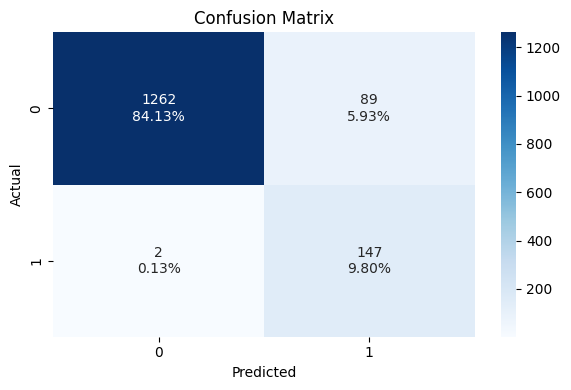

,Accuracy,Recall,Precision,F1 Score
0,0.939333,0.986577,0.622881,0.763636


In [74]:
# Building a Decision Tree model
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]

models = []
for alpha in ccp_alphas:
# Building a Decision Tree model
    pruned = DecisionTreeClassifier(random_state=1, ccp_alpha=alpha, class_weight={0: 0.15, 1: 0.85})
# Training the model
    pruned.fit(X_train, y_train)
    models.append(pruned)

# Making predictions
recalls = [recall_score(y_test, model.predict(X_test)) for model in models]
best_index = np.argmax(recalls)
final_model = models[best_index]

# Visualizing data
plot_conf_matrix(final_model, X_test, y_test)
evaluate_model_classification(final_model, X_test, y_test)

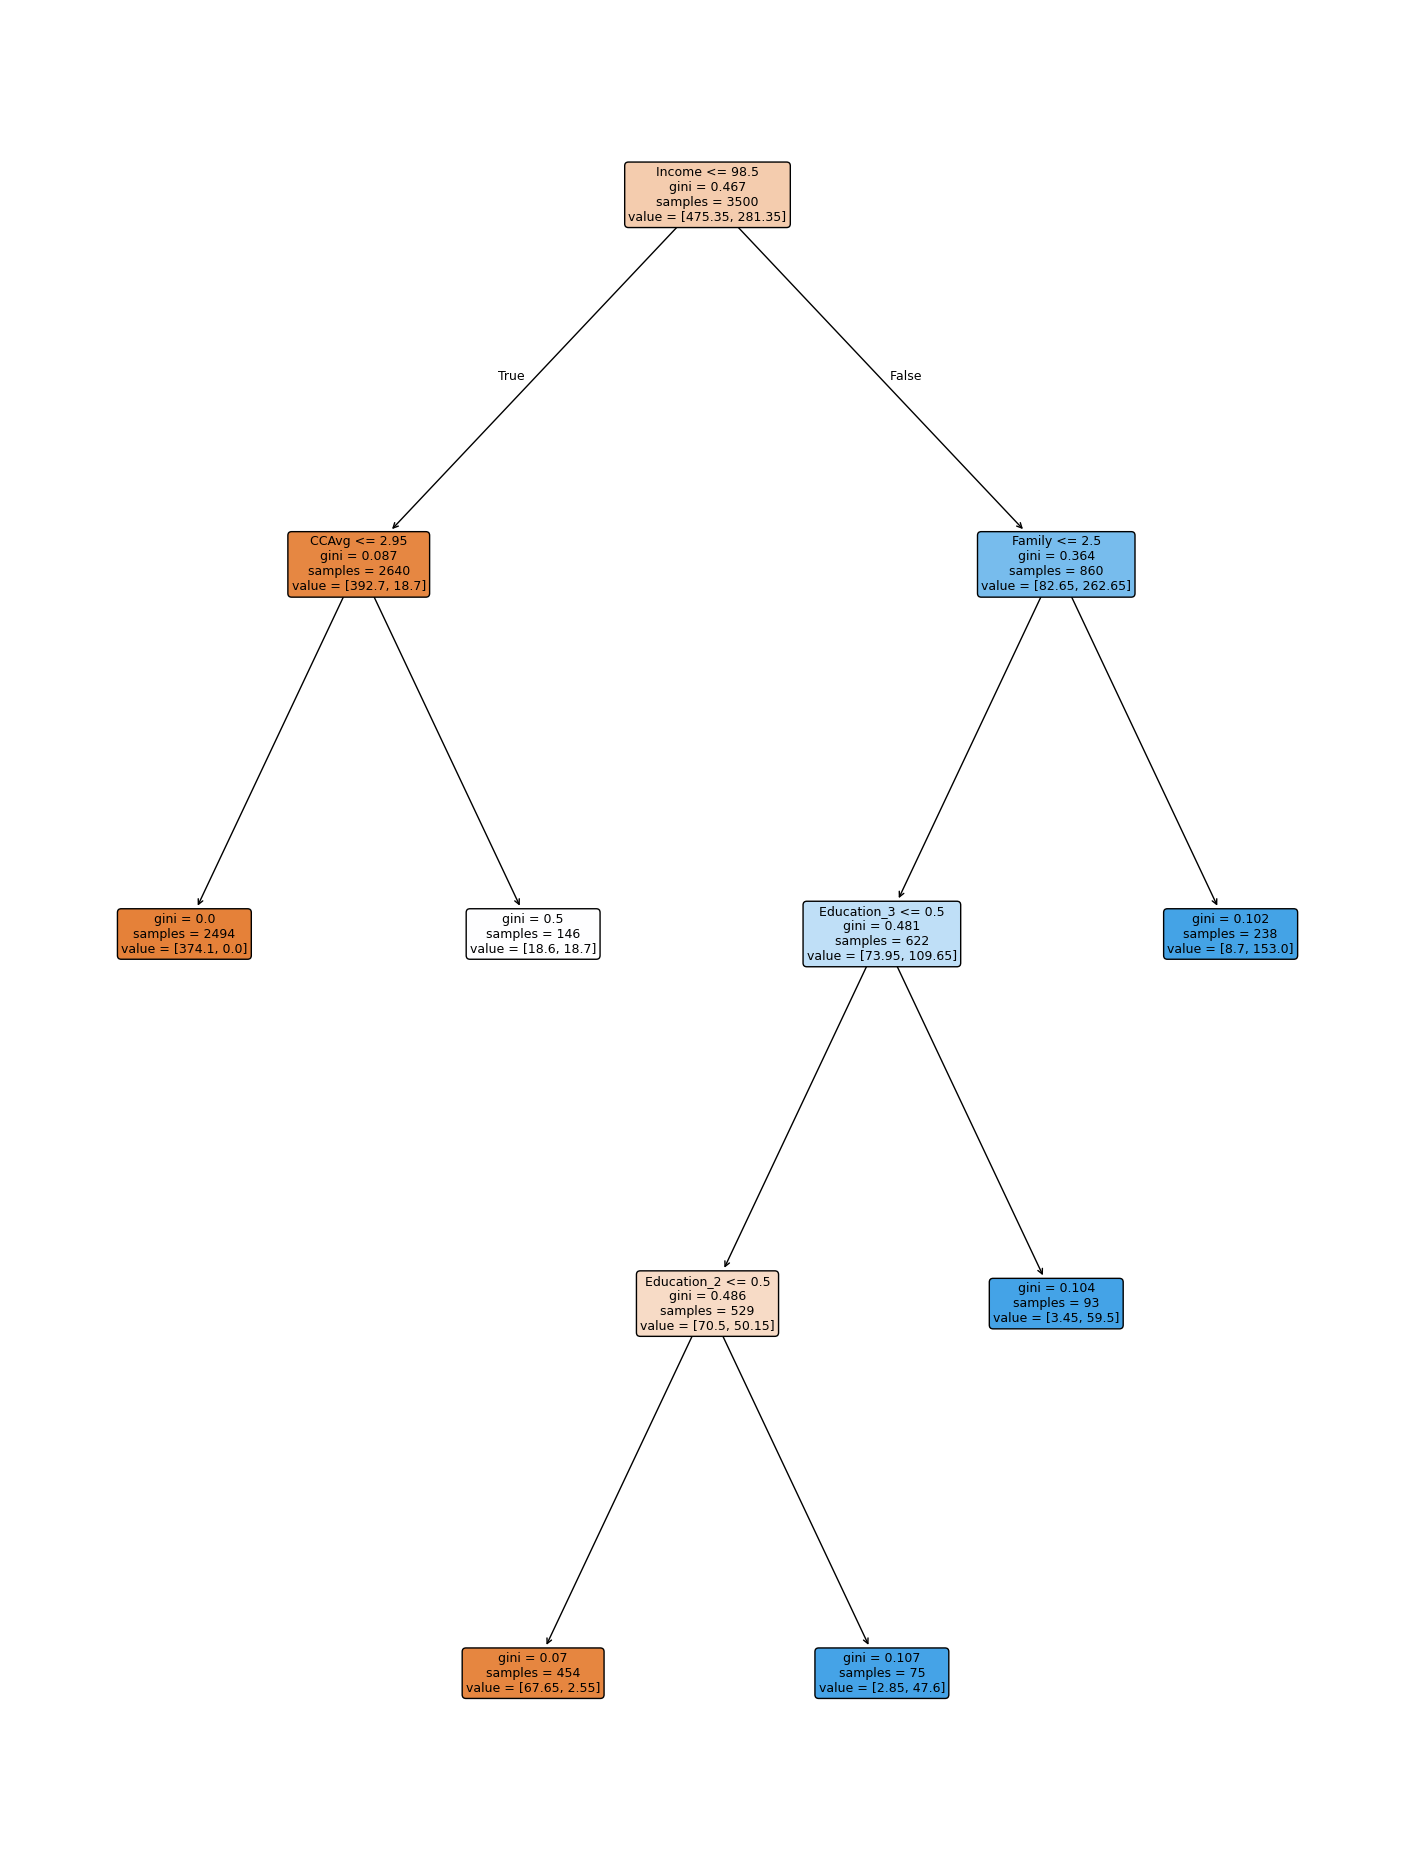

In [75]:
tree_cols = list(X_train.columns)

plt.figure(figsize=(18, 24))
nodes = tree.plot_tree(final_model, feature_names=tree_cols, filled=True, rounded=True, fontsize=9)
for n in nodes:
    if n.arrow_patch:
        n.arrow_patch.set_edgecolor("black")
        n.arrow_patch.set_linewidth(1)
plt.show()


## Model Performance Comparison and Final Model Selection

In [76]:
train_eval = pd.concat([
    train_perf_dt.T,
    evaluate_model_classification(best_model, X_train, y_train).T,
    evaluate_model_classification(final_model, X_train, y_train).T
], axis=1)

train_eval.columns = [
    "Default DT",
    "Pre-Pruned DT",
    "Post-Pruned DT"
]
train_eval

,Default DT,Pre-Pruned DT,Post-Pruned DT
Accuracy,1.0,0.974286,0.935143
Recall,1.0,1.000000,0.990937
Precision,1.0,0.786223,0.594203
F1 Score,1.0,0.880319,0.742922


In [77]:
test_eval = pd.concat([
    test_perf_dt.T,
    evaluate_model_classification(best_model, X_test, y_test).T,
    evaluate_model_classification(final_model, X_test, y_test).T
], axis=1)

test_eval.columns = [
    "Default DT",
    "Pre-Pruned DT",
    "Post-Pruned DT"
]
test_eval


,Default DT,Pre-Pruned DT,Post-Pruned DT
Accuracy,0.981333,0.966000,0.939333
Recall,0.872483,0.966443,0.986577
Precision,0.935252,0.757895,0.622881
F1 Score,0.902778,0.849558,0.763636


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

Customers who make more money, spend more on their credit cards each month, and have CD accounts are more likely to take personal loans. People with graduate or advanced degrees also seem more interested in loans.

Heres what the bank should do:

1. Focus on customers who earn more than $70K a year. They’re more likely to take a loan.
2. Reach out to customers who already have CD accounts. They are more open to loan offers.
3. Target people who spend more on their credit cards every month.
4. Send special loan offers to customers with higher education. They seem more likely to say yes.
5. Use the model to find which customers are most likely to take a loan, and only contact those people. This saves time and money.
6. Keep updating the model with new data so it stays accurate.

___